# DSCI 531 Lecture 6: Intro to Plotting with `pandas` and `matplotlib`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Informative and entertaining resource on the plotting landscape in Python:

- [A dramatic tour through Python's data visualization landscape](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

Useful _learning_ resources linked in these notes:

- [A beginner's guide to matplotlib](http://matplotlib.org/users/beginner.html)
- [Visualization with `pandas`](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)
- [Our EDA plots with `pandas`](http://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb)
- [`pandas` reshaping documentation](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)

Useful _reference_ resources linked in these notes:

- `matplotlib.pyplot`'s [`plot` documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).
- `pandas`' [`plot` documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
- [Named colours](https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib) in `matplotlib`.
- [types of plots we can make with `pandas`](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#other-plots)


From this lecture, students are expected to:

- Make a variety of basic plot types using `matplotlib` + `pandas` -- not so much the syntax, but particularly knowing how the data frame should be wrangled beforehand before plotting with `pandas` (especially when plotting groups). 
    

# 1 `matplotlib`

`matplotlib` is a plotting library intended to follow the plotting procedure in `MATLAB`. Functionality lies in `matplotlib.pyplot`, which we've shortened to `plt` here.

## 1.1 Basics

The most basic method is the `plot` method:

In [5]:
plt.plot([1,2,4,8,16])

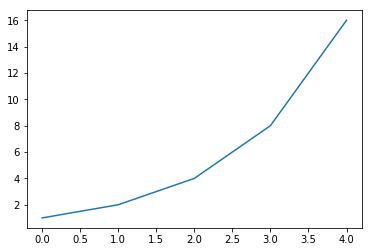

In [6]:
plt.show()

The canvas goes blank afterwards:

In [7]:
plt.show()

We can layer things, like we do in `ggplot2`, by just executing more plotting commands -- but without the explicit `+` symbols (and therefore multi-layer plots can't be saved as individual objects).

This is probably the most important concept of this section.

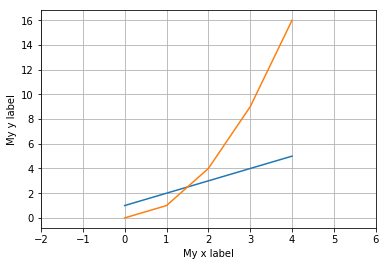

In [8]:
plt.plot([1,2,3,4,5])
plt.plot([0,1,2,3,4], [0,1,4,9,16])
plt.plot([2],[0])
plt.ylabel("My y label")
plt.xlabel("My x label")
plt.grid(True)
plt.xlim([-2,6])
plt.show()

The third argument of `plot` is a "format string", indicating the: 

- colour (`"g"` for green, `"r"` for red, etc.), and 
- line type (`"o"` for points shaped like "o", `"-"` for solid line, `"-."` for dot-dashed line, etc.).

Complete list [in the `plot` documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

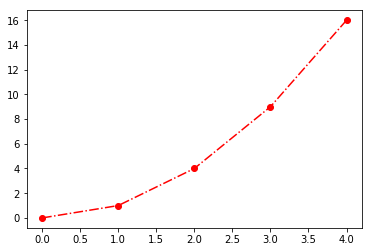

In [10]:
plt.plot([0,1,2,3,4], [0,1,4,9,16], "o-.r")
plt.show()

Or, specify colour in the `c` argument, where you can indicate colours more flexibly. Colours in `matplotlib` can take hexadecimal values, or [named colours](https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib). 

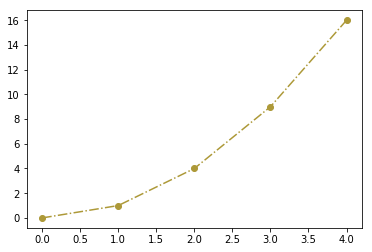

In [11]:
plt.plot([0,1,2,3,4], [0,1,4,9,16], "o-.", c="#ad9938")
plt.show()

## 1.2 Your Turn

You'll learn about two types of error of a machine learning model in DSCI 571: training error and test error. Suppose you obtain the following measurements of training and test error (`err_train` and `err_test`) for different values of a model (hyper)parameter `k`:

In [12]:
k = [5,10,15,20,50,100]
err_train = [97.5, 100.2, 121.2, 133.9, 204.5, 367.4]
err_test = [183.4, 155.5, 150.3, 180.4, 220.4, 300.7]

Make a line plot of both types of error against `k`. Be sure to:

- Label the axes
- Add a legend, too, with labels in the `label` argument of `plt.plot()`, and making the legend show up with the `plt.legend()` function.

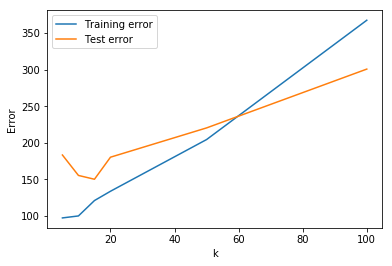

In [17]:
plt.plot(k, err_train, label="Training error")
plt.plot(k, err_test, label="Test error")
plt.legend()
plt.ylabel("Error")
plt.xlabel("k")
plt.show()

## 1.3 Other plot types

`matplotlib` understands some other plot types, too, built-in as methods to `plt`.

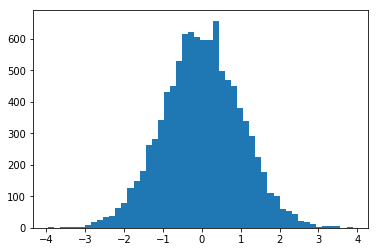

In [18]:
n = 10000
x = np.random.randn(n)
plt.hist(x, bins=50)
plt.show()

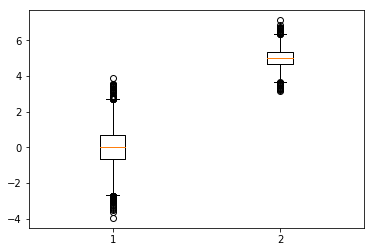

In [19]:
y = np.random.randn(n)/2 + 5
plt.boxplot([x,y])
plt.show()

# 2. Plotting with `pandas` + `matplotlib`

You'll be learning about data wrangling with `pandas` in 523 (Lecture 8), though you'll get to see some snippets here. Last year, a "minimum need to know" about `pandas` was treated, and you can find those notes in [lec6_files/2017_pandas_notes.ipynb](lec6_files/2017_pandas_notes.ipynb).

`pandas` has an object-oriented plotting structure. Sits on top of `matplotlib`. Combine with `matplotlib` for added functionality.

Let's load in the gapminder data, and the `HairEyeColor` data from the R datasets package, stored in `lec6_files`:

In [20]:
gapminder = pd.read_csv("lec6_files/gapminder.csv")
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [21]:
HairEyeColor = pd.read_csv("lec6_files/HairEyeColor.csv")
HairEyeColor.head()

Hair    Eye   n
0  Black   Blue  20
1  Black  Brown  68
2  Black  Green   5
3  Black  Hazel  15
4  Blond   Blue  94

## 2.1 Basics

What happens when we run `plot` on a data frame? It defaults to time series plots for all numeric variables:

- __Aesthetic mappings__: group by column; colour by column; x=rownumber; y=column value.
- __Geometric object__: line

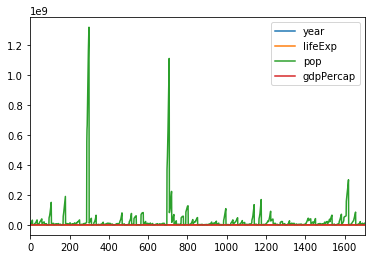

In [22]:
gapminder.plot()
plt.show()

Try `subplots=True` to facet + colour by column instead of group + colour:

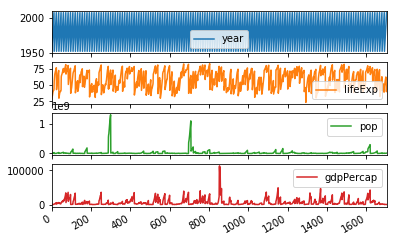

In [23]:
gapminder.plot(subplots=True)
plt.show()

Specify `x` and `y` directly as column names: let's try making a time plot of Canada's life expectancy:

     lifeExp  year
240   68.750  1952
241   69.960  1957
242   71.300  1962
243   72.130  1967
244   72.880  1972
245   74.210  1977
246   75.760  1982
247   76.860  1987
248   77.950  1992
249   78.610  1997
250   79.770  2002
251   80.653  2007


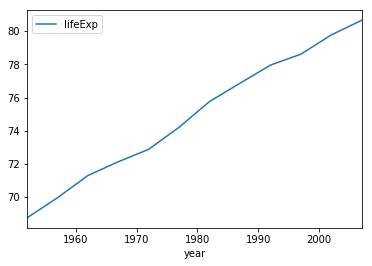

In [24]:
dat1 = gapminder[gapminder.country=="Canada"][["lifeExp", "year"]]
print(dat1)
## --- END WRANGLING ---
dat1.plot(x="year", y="lifeExp")
plt.show()

As with `pyplot`'s `plot` method, `pandas`' version [has plenty of arguments](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) that you can specify, too. Let's take a look at the `kind` argument, which specifies plot type:

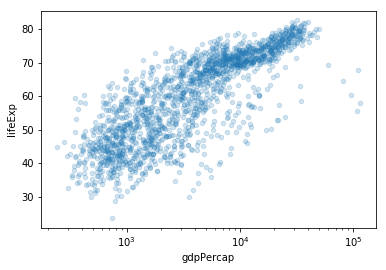

In [25]:
gapminder.plot(x="gdpPercap", y="lifeExp", kind="scatter", 
               logx=True, alpha=0.2)
plt.show()

Alternatively to the above, we could just write `gapminder.plot.<kind>`, like so:

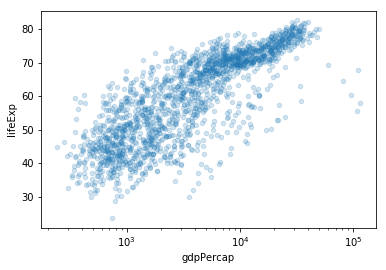

In [26]:
gapminder.plot.scatter(x="gdpPercap", y="lifeExp", 
                       logx=True, alpha=0.2)
plt.show()

Let's bring in some `matplotlib` code:

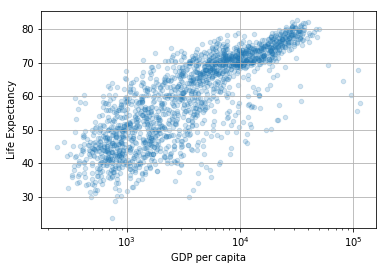

In [27]:
gapminder.plot.scatter(x="gdpPercap", y="lifeExp", 
                       logx=True, alpha=0.2)
plt.grid(True)
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.show()

## 2.2  More functionality

Check out the [types of plots](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#other-plots) that we can make with `pandas`. 

Histogram/kernel density of life expectancies. Notes: 

- Even though `lifeExp` is on the x-axis, we need to indicate it as a `y` variable.
- Use `density=True` to display histogram _proportions_.

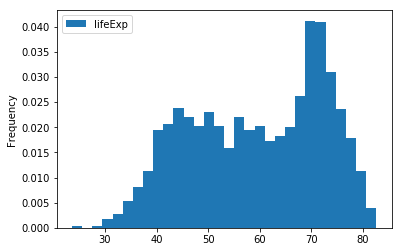

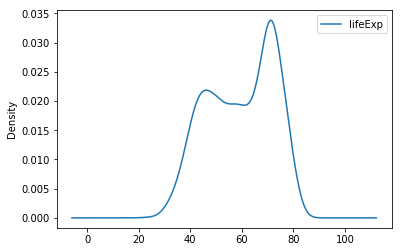

In [31]:
gapminder.plot.hist(y="lifeExp", bins=30, density=True)
plt.show()
gapminder.plot.kde(y="lifeExp")
plt.show()

To make a boxplot of life expectancies, we'll need to first make a wide data frame, where columns are continents. 

continent  Africa  Americas    Asia  Europe  Oceania
0             NaN       NaN  28.801     NaN      NaN
1             NaN       NaN  30.332     NaN      NaN
2             NaN       NaN  31.997     NaN      NaN
3             NaN       NaN  34.020     NaN      NaN
4             NaN       NaN  36.088     NaN      NaN
5             NaN       NaN  38.438     NaN      NaN
6             NaN       NaN  39.854     NaN      NaN
7             NaN       NaN  40.822     NaN      NaN
8             NaN       NaN  41.674     NaN      NaN
9             NaN       NaN  41.763     NaN      NaN
10            NaN       NaN  42.129     NaN      NaN
11            NaN       NaN  43.828     NaN      NaN
12            NaN       NaN     NaN   55.23      NaN
13            NaN       NaN     NaN   59.28      NaN
14            NaN       NaN     NaN   64.82      NaN


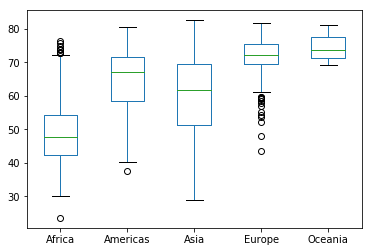

In [33]:
gap_pivot = gapminder.pivot(columns="continent", values="lifeExp")
print(gap_pivot.head(15))
## --- END WRANGLING ---
gap_pivot.plot.box()
plt.show()

Kernel densities and histograms are grouped by column, too:

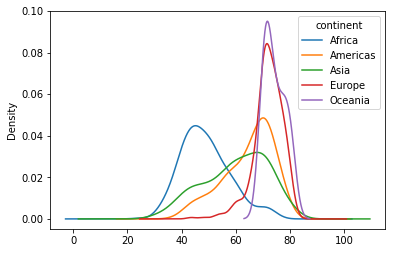

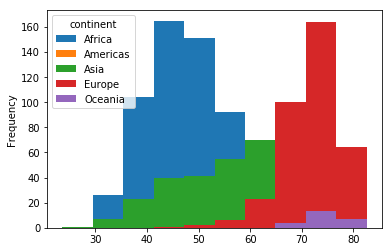

In [53]:
gap_pivot.plot.kde()
plt.show()
gap_pivot.plot.hist()
plt.show()

The overlaid histogram is not very appropriate. But, remember we can indicate `subplots=True`!

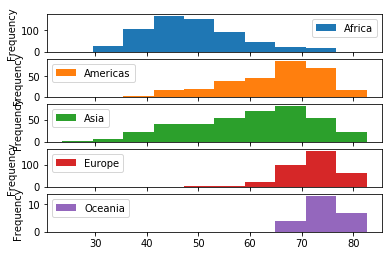

In [23]:
gap_pivot.plot.hist(subplots=True)
plt.show()

Bar charts require the bar heights to be specified directly, so pre-wrangling is often needed. Let's make a bar chart of number of people with each eye colour:

         n
Eye       
Blue   215
Brown  220
Green   64
Hazel   93


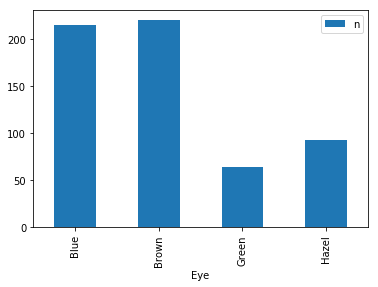

In [24]:
## Wrangle:
dat2 = HairEyeColor.groupby("Eye").sum() 
print(dat2)
## Plot:
dat2.plot.bar()
plt.show()

Grouping/colouring can be done by spreading across columns. Example: add hair colour in the mix:

Hair   Black  Blond  Brown  Red
Eye                            
Blue      20     94     84   17
Brown     68      7    119   26
Green      5     16     29   14
Hazel     15     10     54   14


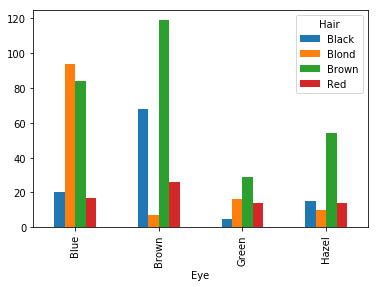

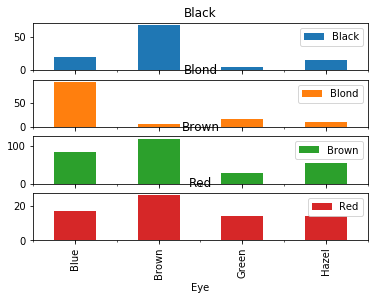

In [25]:
dat4 = HairEyeColor.pivot(index="Eye", columns="Hair", values="n")
print(dat4)
dat4.plot.bar()
plt.show()
dat4.plot.bar(subplots=True)
plt.show()

## 2.3 Exercises

You've been given data so that you don't need to do any wrangling. Where applicable, you will have to choose between tidy and wide format.

1\. Plot the population trend of India over time.

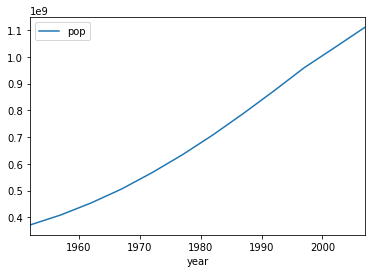

In [54]:
dat231 = gapminder[gapminder.country=="India"]
dat231
dat231.plot("year", "pop")
plt.show()

2\. Make boxplots of `gdpPercap` of the world over time. 

   year   gdpPercap
0  1952  779.445314
1  1957  820.853030
2  1962  853.100710
3  1967  836.197138
4  1972  739.981106
5  1977  786.113360
6  1982  978.011439
7  1987  852.395945
8  1992  649.341395
9  1997  635.341351
year        1952       1957       1962        1967        1972       1977  \
0     779.445314        NaN        NaN         NaN         NaN        NaN   
1            NaN  820.85303        NaN         NaN         NaN        NaN   
2            NaN        NaN  853.10071         NaN         NaN        NaN   
3            NaN        NaN        NaN  836.197138         NaN        NaN   
4            NaN        NaN        NaN         NaN  739.981106        NaN   
5            NaN        NaN        NaN         NaN         NaN  786.11336   
6            NaN        NaN        NaN         NaN         NaN        NaN   
7            NaN        NaN        NaN         NaN         NaN        NaN   
8            NaN        NaN        NaN         NaN         NaN        NaN   
9         

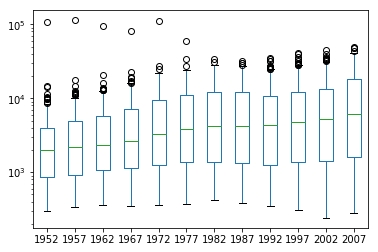

In [47]:
dat232_a = gapminder[["year", "gdpPercap"]]
print(dat232_a.head(10))
dat232_b = dat232_a.pivot(columns="year", values="gdpPercap")
print(dat232_b.head(10))
dat232_b.plot.box(logy=True)
plt.show()

3\. Make a bar chart of `gdpPercap` for countries in Oceania, where the x-axis has the `year`s 2002 and 2007, on:
    1. a single plot, with bars side-by-side.   
    2. one plot per country.

          country  year    gdpPercap
70      Australia  2002  30687.75473
71      Australia  2007  34435.36744
1102  New Zealand  2002  23189.80135
1103  New Zealand  2007  25185.00911
country    Australia  New Zealand
year                             
2002     30687.75473  23189.80135
2007     34435.36744  25185.00911


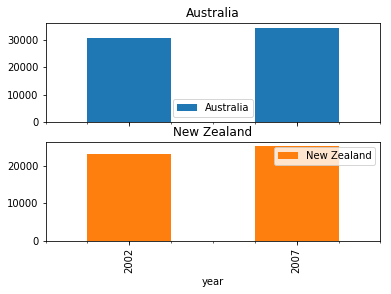

In [52]:
dat233_a = gapminder[(gapminder.continent=="Oceania") & (gapminder.year.isin([2002, 2007]))][["country", "year", "gdpPercap"]]
print(dat233_a)
dat233_b = dat233_a.pivot(index="year",  columns="country", values="gdpPercap")
print(dat233_b)
dat233_b.plot.bar(subplots=True)
plt.show()

4\. Make a histogram of the world's life expectancy in 1952.

In [29]:
dat234 = gapminder[gapminder.year==1952]
print(dat234.head(10))
# YOUR_CODE_HERE

         country continent  year  lifeExp       pop     gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333    779.445314
12       Albania    Europe  1952   55.230   1282697   1601.056136
24       Algeria    Africa  1952   43.077   9279525   2449.008185
36        Angola    Africa  1952   30.015   4232095   3520.610273
48     Argentina  Americas  1952   62.485  17876956   5911.315053
60     Australia   Oceania  1952   69.120   8691212  10039.595640
72       Austria    Europe  1952   66.800   6927772   6137.076492
84       Bahrain      Asia  1952   50.939    120447   9867.084765
96    Bangladesh      Asia  1952   37.484  46886859    684.244172
108      Belgium    Europe  1952   68.000   8730405   8343.105127


# 3. Subplots/Axes

Try a `gdpPercap` vs `lifeExp` scatterplot of Americas and Africa, coloured by continent. What went wrong?

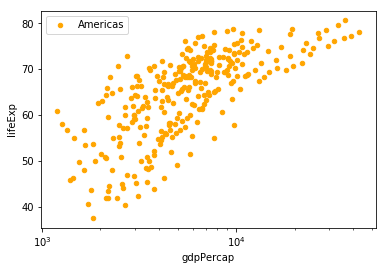

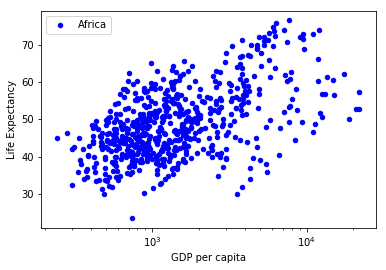

In [37]:
dat5 = gapminder[gapminder.continent=="Americas"]
dat6 = gapminder[gapminder.continent=="Africa"]
dat5.plot.scatter(x="gdpPercap", y="lifeExp", 
                       logx=True, color="orange", label="Americas")
dat6.plot.scatter(x="gdpPercap", y="lifeExp", 
                       logx=True, color="blue", label="Africa")
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

We need to indicate that we want to share "axes". We can do that with the `ax` argument onto an initiated plot:

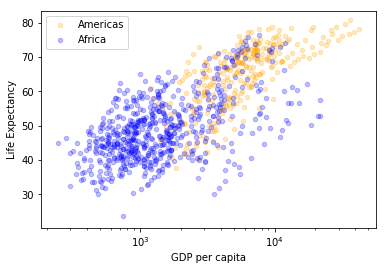

In [38]:
fig5 = dat5.plot.scatter(x="gdpPercap", y="lifeExp", 
                       logx=True, alpha=0.25, color="orange", label="Americas")
dat6.plot.scatter(x="gdpPercap", y="lifeExp", ax=fig5,
                       logx=True, alpha=0.25, color="blue", label="Africa")
plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

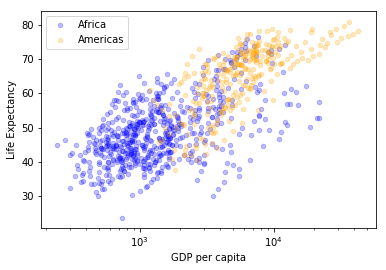

In [39]:
fig6 = dat6.plot.scatter(x="gdpPercap", y="lifeExp", 
                       logx=True, alpha=0.25, color="blue", label="Africa")
dat5.plot.scatter(x="gdpPercap", y="lifeExp", ax=fig6,
                       logx=True, alpha=0.25, color="orange", label="Americas")

plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

Alternatively, we can specify a blank canvas with `plt.subplots()`, which outputs a tuple of length two: the figure, followed by the axes: 

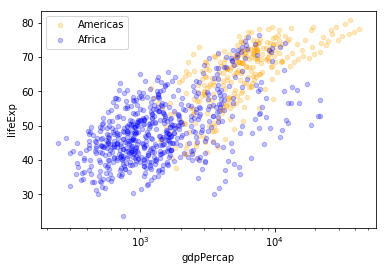

In [41]:
fig7, axes7 = plt.subplots()
dat5.plot.scatter(x="gdpPercap", y="lifeExp", ax=axes7,
                  logx=True, alpha=0.25, color="orange", label="Americas")
dat6.plot.scatter(x="gdpPercap", y="lifeExp", ax=axes7,
                  logx=True, alpha=0.25, color="blue", label="Africa")
plt.legend()
plt.show(fig7)